# Random Forest regressor

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor


from statsmodels.tools.eval_measures import stde




## Read the etl info results

In [2]:
df_info = pd.read_csv('../../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,False,False,False,False,Lasso,False


## Read the dataset

In [3]:
df = pd.read_csv('../../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,SensorTime,CaptureTime,Stage,Discharge,grayMean,graySigma,hMean,hSigma,grayMean0,hMean0,entropyMean1,entropySigma1,hMean1,WwRawLineMean,WwRawLineSigma,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,97.405096,39.623303,105.368375,41.572939,97.084576,106.047217,0.092532,0.632319,169.963345,0.000000,0.000000,0.000000,0.000000
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,104.066757,40.179745,112.399458,41.795584,105.668610,114.886049,0.090279,0.620077,175.220945,0.000000,0.000000,0.000000,0.000000
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,105.636831,40.533218,114.021526,42.145582,106.786307,116.053131,0.090561,0.620853,179.554842,0.000000,0.000000,0.000000,0.000000
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,104.418949,41.752678,112.612830,43.575351,107.674299,117.005027,0.095616,0.651642,180.921521,0.000000,0.000000,0.000000,0.000000
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,106.763541,44.442097,114.839424,46.302008,114.858589,124.519271,0.101601,0.688024,183.131779,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,82.872720,57.702652,87.260572,61.485334,43.737485,46.616662,0.120668,0.824195,126.181417,38385.370066,15952.029728,37550.894823,16444.401209
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,89.028383,55.840861,94.175906,59.006132,46.268458,49.716207,0.113951,0.783437,131.754200,40162.989292,15467.708856,39397.339095,16009.008049
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,94.722097,54.355753,100.534577,56.921028,49.841325,53.984763,0.110346,0.766074,138.014068,42095.946590,16770.357949,41350.006568,17489.374617
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,96.693270,52.787629,102.891159,55.083532,53.912185,58.857575,0.112571,0.777376,146.470365,45345.490954,17498.432849,44553.920296,18268.294896


In [4]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['Year'] = df['SensorTime'].dt.year
df['Month'] = df['SensorTime'].dt.month

In [5]:
df.dtypes

SensorTime          datetime64[ns]
CaptureTime                 object
Stage                      float64
Discharge                  float64
grayMean                   float64
graySigma                  float64
hMean                      float64
hSigma                     float64
grayMean0                  float64
hMean0                     float64
entropyMean1               float64
entropySigma1              float64
hMean1                     float64
WwRawLineMean              float64
WwRawLineSigma             float64
WwCurveLineMean            float64
WwCurveLineSigma           float64
Year                         int64
Month                        int64
dtype: object

In [6]:
df = df[(df.Stage > 0) & (df.Discharge > 0)]

In [7]:
df.isna().sum()

SensorTime          0
CaptureTime         0
Stage               0
Discharge           0
grayMean            0
graySigma           0
hMean               0
hSigma              0
grayMean0           0
hMean0              0
entropyMean1        0
entropySigma1       0
hMean1              0
WwRawLineMean       0
WwRawLineSigma      0
WwCurveLineMean     0
WwCurveLineSigma    0
Year                0
Month               0
dtype: int64

## Divide dataset to X and Y

In [8]:
np.random.seed(0)

df_train = df[(df.Year >= 2012) & (df.Year <= 2017)]
df_train = df_train.iloc[np.random.permutation(len(df_train))]

df_test = df[(df.Year >= 2018) & (df.Year <= 2019)]

In [9]:
df_train = df_train.drop(columns=["Year", "SensorTime", "CaptureTime"])
#df_val = df_val.drop(columns=["Year", "SensorTime", "CaptureTime"])
df_test = df_test.drop(columns=["Year", "SensorTime", "CaptureTime"])

In [10]:
y_train = df_train["Stage"]
X_train = df_train.drop(columns=["Stage", "Discharge"])

y_test = df_test["Stage"]
X_test = df_test.drop(columns=["Stage", "Discharge"])

In [11]:
print(X_train.shape)
print(y_train.shape)

(27421, 14)
(27421,)


In [12]:
input_shape = X_train.shape
output_shape = y_train.shape

print(input_shape, output_shape)

(27421, 14) (27421,)


## Train model

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestRegressor(random_state=0))
])

param_grid = {'clf__n_estimators': np.arange(50, 300, 1), 'clf__max_features': ["sqrt", 1.0, "log2"]}

clf = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, n_jobs=8, verbose=3, scoring="neg_mean_squared_error")

In [14]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 4/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.120 total time=  11.5s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.115 total time=  11.8s
[CV 2/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.120 total time=  11.8s
[CV 3/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.122 total time=  12.1s
[CV 5/5] END clf__max_features=log2, clf__n_estimators=193;, score=-0.113 total time=  12.1s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.115 total time=  12.4s
[CV 2/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.120 total time=  12.4s
[CV 3/5] END clf__max_features=log2, clf__n_estimators=206;, score=-0.123 total time=  12.6s
[CV 1/5] END clf__max_features=log2, clf__n_estimators=118;, score=-0.115 total time=   6.8s
[CV 5/5] END clf__max_features=log2, clf__n_estimators=118;, score=-0.113 total time=   6.5s
[CV 4/5]

/home/nkspartan/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END clf__max_features=sqrt, clf__n_estimators=209;, score=-0.120 total time=  16.9s
[CV 5/5] END clf__max_features=1.0, clf__n_estimators=118;, score=-0.109 total time=  31.3s
[CV 2/5] END clf__max_features=log2, clf__n_estimators=145;, score=-0.121 total time=  11.0s
[CV 3/5] END clf__max_features=log2, clf__n_estimators=145;, score=-0.122 total time=  10.9s
[CV 4/5] END clf__max_features=log2, clf__n_estimators=145;, score=-0.120 total time=  11.1s
[CV 5/5] END clf__max_features=log2, clf__n_estimators=145;, score=-0.113 total time=   9.4s
[CV 1/5] END clf__max_features=sqrt, clf__n_estimators=68;, score=-0.115 total time=   3.9s
[CV 2/5] END clf__max_features=sqrt, clf__n_estimators=68;, score=-0.122 total time=   3.8s
[CV 3/5] END clf__max_features=sqrt, clf__n_estimators=68;, score=-0.123 total time=   4.3s
[CV 4/5] END clf__max_features=sqrt, clf__n_estimators=68;, score=-0.121 total time=   3.7s
[CV 5/5] END clf__max_features=sqrt, clf__n_estimators=68;, score=-0.114 to

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=20, n_jobs=8,
                   param_distributions={'clf__max_features': ['sqrt', 1.0,
                                                              'log2'],
                                        'clf__n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90...
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299])},
                   scoring='neg_mean_squared_error', verbose=3)

## Test model

In [15]:
clf.best_score_

-0.11015483464061511

In [16]:
clf.best_params_

{'clf__n_estimators': 177, 'clf__max_features': 1.0}

In [17]:
clf.score(X_test, y_test)

-0.2208339851992373

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("R^2: ", r2_score(y_test, y_pred))
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", mean_squared_error(y_test, y_pred, squared=False))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("mape: ", mean_absolute_percentage_error(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(),
      y_pred.squeeze(), ddof=2))


R^2:  0.4345404446266534
mse:  0.2208339851992373
rmse:  0.46992976624091104
mae:  0.27238347762819287
mape:  0.10475067280748779
Error estandar:  0.45078652358584226


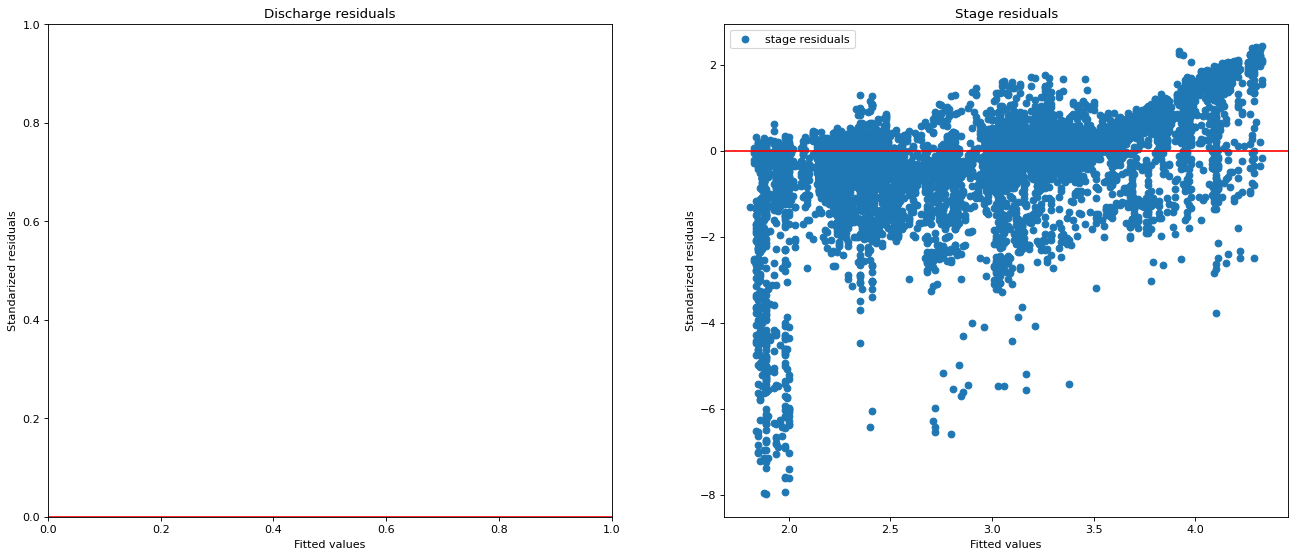

In [20]:
residuals = y_test - y_pred
residuals_std = residuals / residuals.std()

y_real_stage = y_test
residual_stage = residuals

#y_real_discharge = np.array([i[-1] for i in y_test])
#residual_discharge = np.array([i[-1] for i in residuals])


figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[1].scatter(y_real_stage, residual_stage / residual_stage.std(), label="stage residuals")
#ax[0].scatter(y_real_discharge, residual_discharge / residual_discharge.std(), label="discharge residuals")
ax[1].axhline(y=0.0, color='r', linestyle='-')
ax[0].axhline(y=0.0, color='r', linestyle='-')

ax[1].set_title("Stage residuals")
ax[0].set_title("Discharge residuals")

ax[1].set_xlabel("Fitted values")
ax[0].set_xlabel("Fitted values")
ax[1].set_ylabel("Standarized residuals")
ax[0].set_ylabel("Standarized residuals")

plt.legend()
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad

#figure = sm.qqplot(residual_stage / residual_stage.std(), line ='45', label='stage')
plt.show()

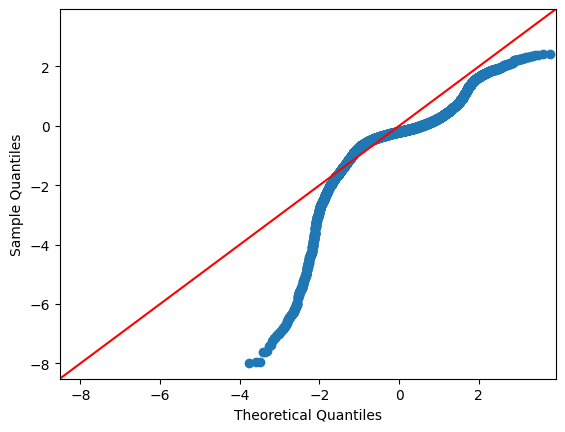

In [22]:
figure = sm.qqplot(residual_stage / residual_stage.std(), line='45', label='discharge')
plt.show()

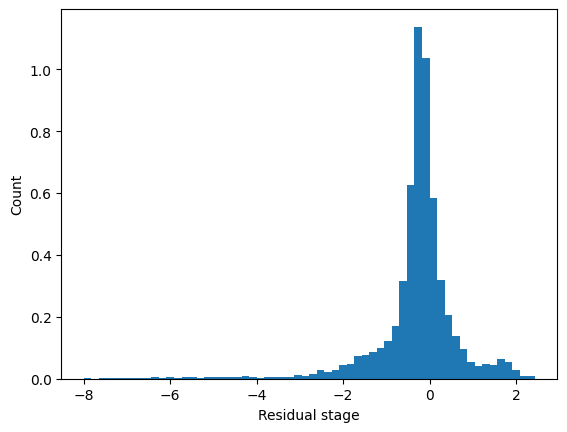

In [23]:
plt.hist(residual_stage / residual_stage.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual stage');
plt.show()

In [24]:
"""plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()"""

"plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)\nplt.ylabel('Count')\nplt.xlabel('Residual discharge');\nplt.show()"

In [25]:
stat, pval = normal_ad(residual_stage / residual_stage.std())
print("p-value:", pval)

if pval < 0.05:
    print("Hay evidencia de que los residuos no provienen de una distribución normal.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos vienen de una distribución normal.")


p-value: 0.0
Hay evidencia de que los residuos no provienen de una distribución normal.


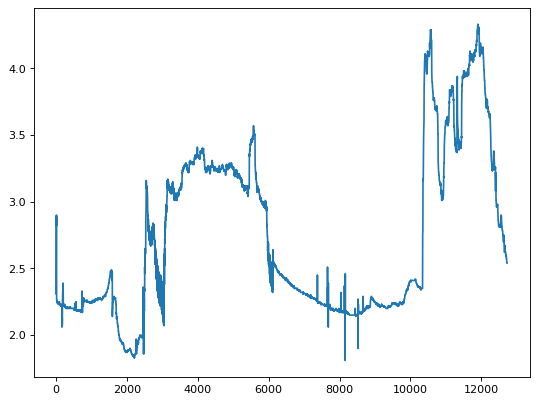

In [26]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(len(y_test)), y_test, label="Stage real")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


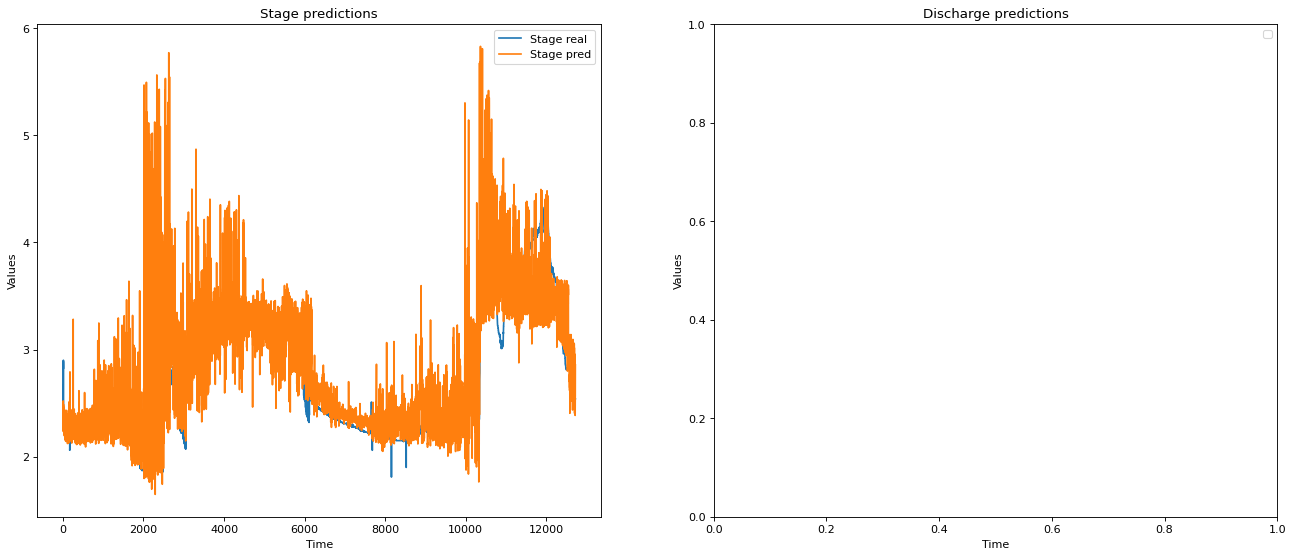

In [27]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[0].plot(np.arange(len(y_test)), y_test, label="Stage real")
ax[0].plot(np.arange(len(y_test)), y_pred, label="Stage pred")

ax[0].set_title("Stage predictions")
ax[1].set_title("Discharge predictions")

ax[1].set_ylabel("Values")
ax[0].set_ylabel("Values")
ax[1].set_xlabel("Time")
ax[0].set_xlabel("Time")

ax[0].legend()
ax[1].legend()
plt.show()